In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './data/co2-annmean-mlo_csv.csv'
df_CO2 = pd.read_csv(filepath_or_buffer=file_path)
df_CO2.head()

,Year,Mean,Uncertainty
0,1959-11-01,315.97,0.12
1,1960-11-01,316.91,0.12
2,1961-11-01,317.64,0.12
3,1962-11-01,318.45,0.12
4,1963-11-01,318.99,0.12


In [7]:
file_path ='./data/Annual_Surface_Temperature_Change.csv'
df_temp = pd.read_csv(filepath_or_buffer=file_path)
df_temp.head()
print(df_temp.columns)
print(df_temp.shape)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')
(225, 72)


x_data [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
y_data [0.1630531914893617, -0.01347619047619048, -0.006042553191489363, -0.07005851063829789, -0.24702659574468086, 0.10550520833333336, -0.11083246073298428, -0.19910994764397907, 0.15794210526315788, 0.09248677248677246, -0.20051308900523562, -0.08490625, 0.2293678756476684, -0.16303125, -0.023494680851063827, -0.24591534391534392, 0.1658162162162162, 0.06962962962962962, 0.2337989417989418, 0.24728795811518325, 0.1786439790575916, 0.17649479166666668, 0.34459473684210523, 0.08011702127659574, 0.07128723404255319, 0.1511578947368421, 0.405021052631579, 0.4900894736842106, 0.25616842105263155, 0.5552592592592592, 0.3

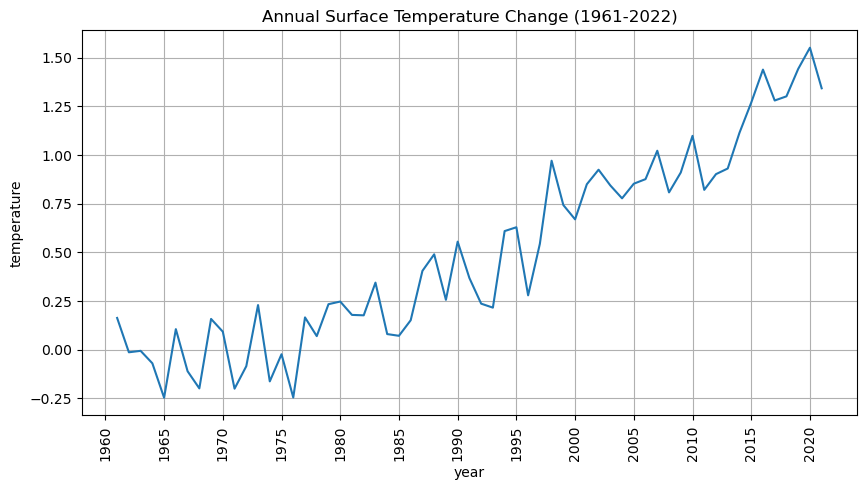

In [84]:
x_data = []
y_data = []
for i in range(1961, 2022):
    x_data.append(i)
    y_data.append(np.mean(df_temp['F' + str(i)]))

print("x_data", x_data)
print("y_data", y_data)

plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data)
plt.grid()
plt.xticks(np.arange(min(x_data)-1, max(x_data)+1, 5.0), rotation=90)
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Annual Surface Temperature Change (1961-2022)')

plt.savefig('temp_change.png')
plt.show()


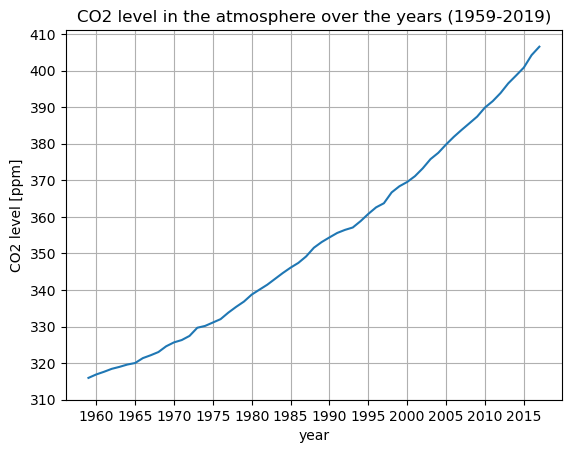

In [85]:
year = df_CO2.Year.str.split('-')
co2 = df_CO2.Mean
y = year.str[0].astype(int)
plt.plot(y, co2)
plt.title('CO2 level in the atmosphere over the years (1959-2019)')
plt.xlabel('year')
plt.ylabel('CO2 level [ppm]')
plt.xticks(np.arange(min(y)+1, max(y)+1, 5.0))
plt.yticks(np.arange(310, 420, 10.0))
plt.grid()
plt.savefig('co2_level.png', dpi=300)
plt.show()


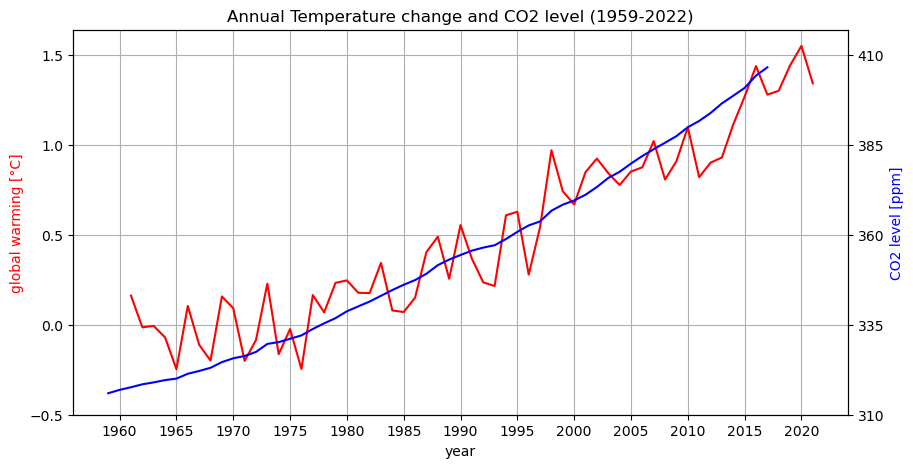

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x_data, y_data, color='red')
ax1.set_xlabel('year')
ax1.set_ylabel('global warming [°C]', color='red')
ax1.tick_params(axis='y')
ax1.set_xticks(np.arange(min(x_data)-1, max(x_data)+1, 5.0))
ax1.set_yticks(np.arange(-0.5, 2, 0.5))
ax1.set_title('Annual Temperature change and CO2 level (1959-2022)')
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(y, co2, color='blue')
ax2.set_ylabel('CO2 level [ppm]', color='blue')
ax2.tick_params(axis='y')
ax2.set_ylim([int(min(co2)-5), int(max(co2)+11)])
ax2.set_yticks(np.arange(int(min(co2)-5), int(max(co2)+11), 25.0))

plt.savefig('co2_and_temp.png', dpi=300)
plt.show()
